### Weekly assignment week 41
Bjørnstad, Johannessen, and Merlid

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from data_gen import DataGen, Poly1D2Deg
from grad_desc import Model
from plotting import Plotting 

### Task 1: Plain gradient descent 

A plain gradient descent with a fixed learning rate.

In [2]:
data = Poly1D2Deg(1000)

In [3]:
def tune_eta(model_type: str = "OLS", tpe: str = "Constant", batch_size: int = 0, epochs: int = 10000) -> float:
    
    etas = [0.01, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 1.1]
    best_eta = etas[0]
    best_loss = 1e5

    for e in etas:
        model = Model(data, model_type = model_type)
        model.gradient_descent(eta = e, tpe = tpe, batch_size = batch_size, epochs = epochs) 
        loss = model.MSE_list[-1]
        if loss < best_loss:
            best_loss = loss
            best_eta = e

    #print(f"Best eta: {best_eta}, Best loss: {best_loss}")
    return best_eta, best_loss

In [4]:
best_eta, best_loss = tune_eta("OLS")

/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/miamerlid/Desktop/Master/FYS-STK4155/FYS-STK-projects/project_2/src/grad_desc.py:88: RuntimeWarning: overflow encountered in square
  error = np.mean((self.y - preds)**2)
/Users/miamerlid/Desktop/Master/FYS-STK4155/FYS-STK-projects/project_2/src/grad_desc.py:47: RuntimeWarning: overflow encountered in matmul
  return 2.0/self.n*X.T @ (X @ beta-y)
/Users/miamerlid/Desktop/Master/FYS-STK4155/FYS-STK-projects/project_2/src/learn_rate.py:23: RuntimeWarning: invalid value encountered in subtract
  return beta - self.eta*gradients
/Users/miamerlid/Desktop/Master/FYS-STK4155/FYS-STK-projects/project_2/src/grad_desc.py:87: RuntimeWarning: overflow encountered in matmul
  preds = X @ self.beta


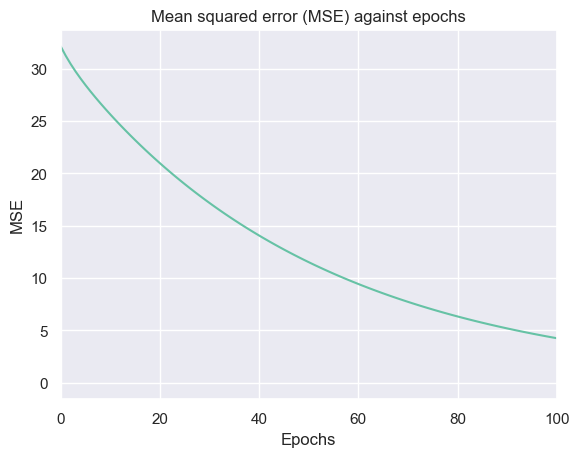

In [5]:
model = Model(data, "OLS")
model.gradient_descent(eta = best_eta)

plots = Plotting(model)
plots.plot_loss(xlim=100)
#plots.plot_betas()  

In [6]:
#best_eta, best_loss = tune_eta("Ridge")
#model = Model(data, "Ridge")
#model.gradient_descent(eta = best_eta)

#plots = Plotting(model)
#plots.plot_loss(xlim=100)
#plots.plot_betas()  

### Task 2: Stochastic gradient descent

In [7]:
best_eta, best_loss = tune_eta("OLS", "Momentum")

/Users/miamerlid/Desktop/Master/FYS-STK4155/FYS-STK-projects/project_2/src/learn_rate.py:28: RuntimeWarning: invalid value encountered in add
  v = self.gamma*self.prev_v + self.eta*gradients


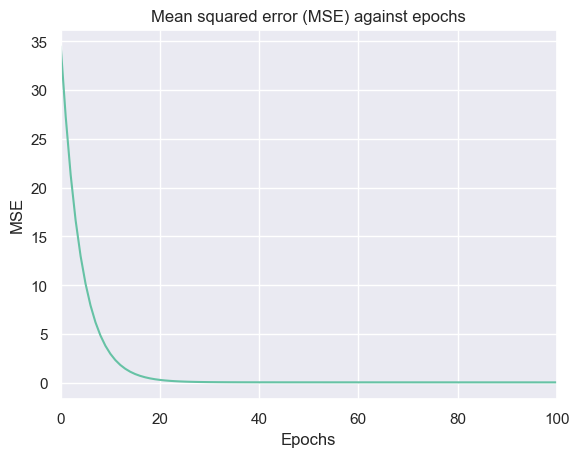

In [8]:
model = Model(data, "OLS")
model.gradient_descent(tpe = "Momentum", eta = best_eta)

plots = Plotting(model)
plots.plot_loss(xlim=100)

In [9]:
best_eta, best_loss = tune_eta("Ridge", "Momentum")

#model = Model(data, "Ridge")
#model.gradient_descent(tpe = "Momentum", eta = best_eta)

#plots = Plotting(model)
#plots.plot_loss(xlim=100)

/Users/miamerlid/Desktop/Master/FYS-STK4155/FYS-STK-projects/project_2/src/grad_desc.py:49: RuntimeWarning: overflow encountered in matmul
  return 2.0/self.n*X.T @ (X @ beta-y)+2*Lambda*beta
/Users/miamerlid/Desktop/Master/FYS-STK4155/FYS-STK-projects/project_2/src/grad_desc.py:49: RuntimeWarning: overflow encountered in add
  return 2.0/self.n*X.T @ (X @ beta-y)+2*Lambda*beta


Compare the convergence with a fixed learning rate and the momentum method:

### Task 3: Mini-batched and epochs 

In [10]:
def tune_batch_epoch(model_type: str = "OLS", tpe: str = "Constant") -> None:
    batch_sizes = [10, 100, 200]
    epochs = [10, 100, 1000]
    best_batch_size = 0
    best_epochs = 0
    best_loss = 1e5

    for b in tqdm(batch_sizes):
        for e in epochs:
            eta, loss = tune_eta(model_type, tpe, b, e)
            if loss < best_loss:
                best_loss = loss
                best_batch_size = b
                best_epochs = e

    print(f"Best combo: {best_batch_size, best_epochs}, Best loss: {best_loss}")
    return best_batch_size, best_epochs

In [11]:
#best_batch_size, best_epochs = tune_batch_epoch("OLS", "Constant")
# can do the other three combinations 

Discuss the results as functions of the various parameters (size of batches, number of epochs etc):

### Task 4: Adding Adagrad

Skjønte ikke Morten sine notater, leste her: https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827